In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [17]:
diabetes_init = pd.read_csv("diabetes.csv")

## Explore and Remove Outliers
- Removing all values except pregnancies that are 0
- Removing Outliers for insulin that are not withi 3 STDs 
- This almost divides count by 2

In [18]:
diabetes_init.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
diabetes_init.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
## filter out null values

In [21]:
diabetes= diabetes_init[diabetes_init["Insulin"] > 0]
diabetes= diabetes[diabetes["Glucose"] > 0]
diabetes= diabetes[diabetes["BMI"] > 0]
diabetes= diabetes[diabetes["BloodPressure"] > 0]

In [22]:
diabetes.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
## remove all values that are not within 3 standard deviations 
diabetes = diabetes[(diabetes["Insulin"].abs()-diabetes["Insulin"].mean()) <= (3*diabetes["Insulin"].std())]


In [24]:
diabetes.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,3.309896,121.656250,70.651042,29.013021,146.085938,32.999219,0.519464,30.713542,0.325521
std,3.224467,30.239368,12.516854,10.495422,96.457571,6.995140,0.335450,10.069535,0.469180
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,28.250000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,123.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,142.000000,78.000000,36.000000,184.250000,36.925000,0.683250,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,510.000000,67.100000,2.420000,81.000000,1.000000


## Data Viz
- Simple plot of distribution of different variables

<AxesSubplot:xlabel='Insulin'>

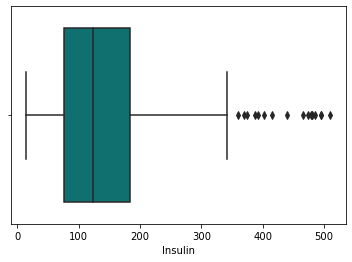

In [25]:
palette = ['navy', 'teal', 'lightskyblue', "lightblue"]
sns.boxplot(x= "Insulin", data = diabetes, color = "teal")


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

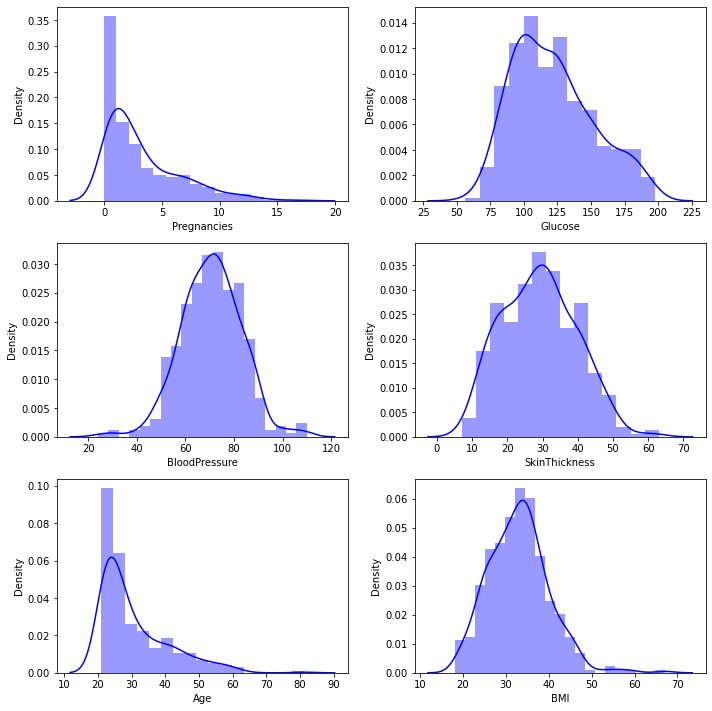

In [26]:

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2,figsize=(10, 10))

sns.distplot(diabetes['Pregnancies'], color = "blue", ax=ax1)
sns.distplot(diabetes['Glucose'], color = "blue", ax=ax2)
sns.distplot(diabetes['BloodPressure'], color = "blue", ax=ax3)
sns.distplot(diabetes['SkinThickness'], color = "blue", ax=ax4)
sns.distplot(diabetes['Age'], color = "blue", ax=ax5)
sns.distplot(diabetes['BMI'], color = "blue", ax=ax6)

plt.tight_layout()
plt.show()

## Preprocessing for Model
- Not much to do since Naive Bayes does not require standardization of quant values + no qual values to encode

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [28]:
X = diabetes.drop(columns="Outcome")
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
14,5,166,72,19,175,25.8,0.587,51
16,0,118,84,47,230,45.8,0.551,31


In [29]:
y = diabetes["Outcome"]
y.head()

3     0
4     1
6     1
14    1
16    1
Name: Outcome, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                   test_size = 0.15, \
                                                   stratify = y, \
                                                   random_state = 0)


## Gaussian NB
- Using Gaussian NB as baseline (purpose of this notebook is to practice Naive BAYES)

In [31]:
from sklearn.naive_bayes import GaussianNB

In [38]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [39]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

print("scores for default model on test set")
print("")
print('Accuracy Score : {}'.format(str(accuracy_score(y_test,clf.predict(X_test)))))
print('Precision Score : {}'.format(str(precision_score(y_test,clf.predict(X_test)))))
print('Recall Score : {}' .format(str(recall_score(y_test,clf.predict(X_test)))))
print('F1 Score : {}'.format(str(f1_score(y_test,clf.predict(X_test)))))


scores for default model on test set

Accuracy Score : 0.7413793103448276
Precision Score : 0.6111111111111112
Recall Score : 0.5789473684210527
F1 Score : 0.5945945945945946


In [40]:
print("scores for default model on test set")
print("")
print('Accuracy Score : {}'.format(str(accuracy_score(y_train,clf.predict(X_train)))))
print('Precision Score : {}'.format(str(precision_score(y_train,clf.predict(X_train)))))
print('Recall Score : {}' .format(str(recall_score(y_train,clf.predict(X_train)))))
print('F1 Score : {}'.format(str(f1_score(y_train,clf.predict(X_train)))))


scores for default model on test set

Accuracy Score : 0.7914110429447853
Precision Score : 0.6826923076923077
Recall Score : 0.6698113207547169
F1 Score : 0.6761904761904762


In [43]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(clf, X_train, y_train, cv=20)
cross_val

array([0.70588235, 0.76470588, 0.82352941, 0.70588235, 0.88235294,
       0.82352941, 0.75      , 0.6875    , 0.8125    , 0.875     ,
       0.8125    , 0.6875    , 0.875     , 0.875     , 0.875     ,
       0.75      , 0.75      , 0.8125    , 0.5625    , 0.75      ])

In [44]:
print(cross_val.mean())
print(cross_val.std())

0.7790441176470588
0.08147261225984413


## Discretizing Values and Plotting Them
- Quick plot before going futher into modelling
- Discretizing values in bins for explanatory variables and looking if there is a trend  

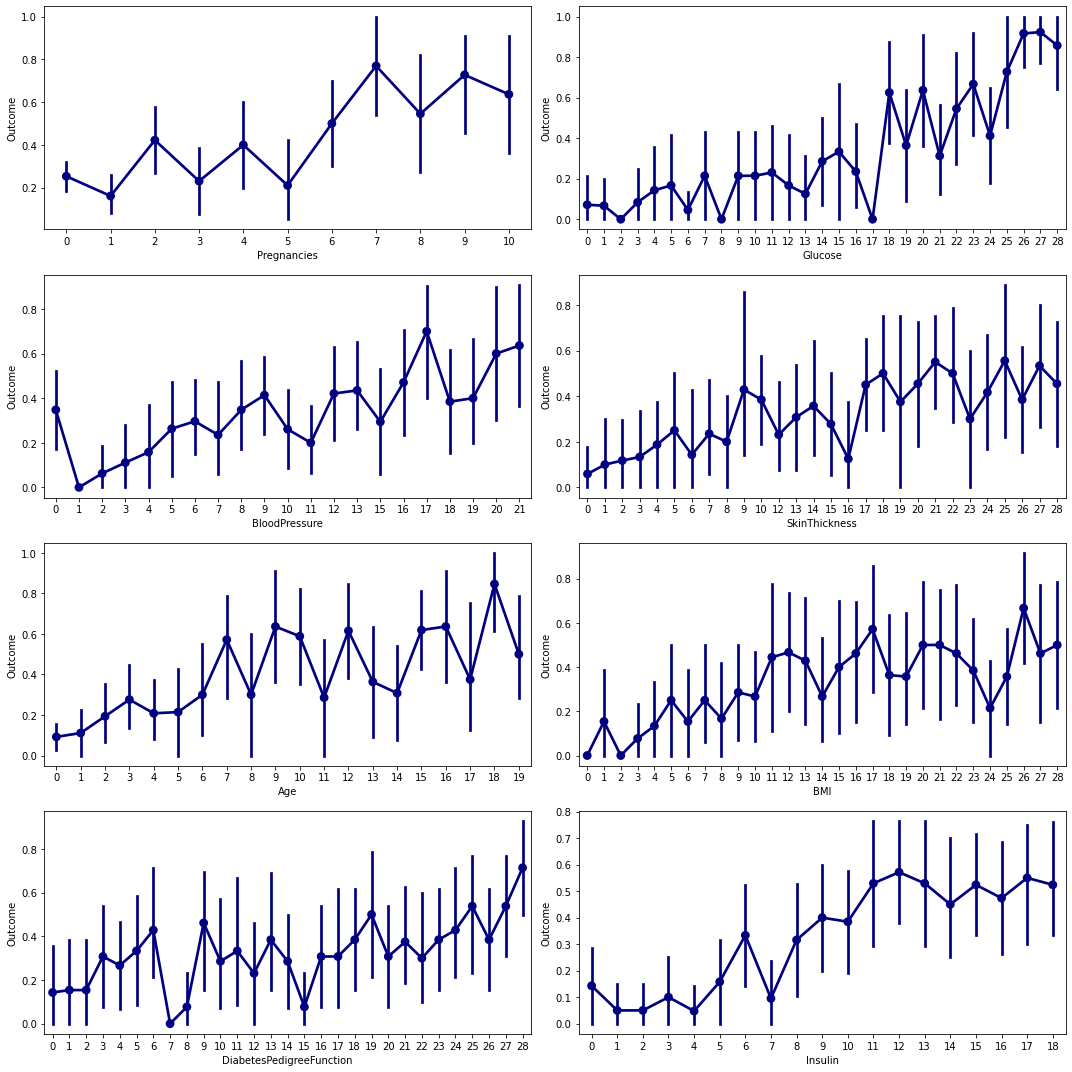

In [45]:
palette = ['navy', 'teal', 'lightskyblue', "lightblue"]
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2,figsize=(15, 15))

sns.pointplot(x = pd.qcut((diabetes['Pregnancies']), 30, duplicates="drop", labels=False),  y = diabetes['Outcome'], color = "navy", ax=ax1)
sns.pointplot(x = pd.qcut((diabetes['Glucose']), 29, duplicates="drop", labels=False),  y = diabetes['Outcome'], color = "navy", ax=ax2)
sns.pointplot(x = pd.qcut((diabetes['BloodPressure']), 29, duplicates="drop", labels=False),  y = diabetes['Outcome'], color = "navy", ax=ax3)
sns.pointplot(x = pd.qcut((diabetes['SkinThickness']), 29, duplicates="drop", labels=False),  y = diabetes['Outcome'], color = "navy", ax=ax4)
sns.pointplot(x = pd.qcut((diabetes['Age']), 29, duplicates="drop", labels=False),  y = diabetes['Outcome'], color = "navy", ax=ax5)
sns.pointplot(x = pd.qcut((diabetes['BMI']), 29, duplicates="drop", labels=False),  y = diabetes['Outcome'], color = "navy", ax=ax6)
sns.pointplot(x = pd.qcut((diabetes['DiabetesPedigreeFunction']), 29, duplicates="drop", labels=False),  y = diabetes['Outcome'], color = "navy", ax=ax7)
sns.pointplot(x = pd.qcut((diabetes['Insulin']), 19, duplicates="drop", labels=False),  y = diabetes['Outcome'], color = "navy", ax=ax8)
plt.tight_layout()
plt.show()

## Bagging Gaussian
- Trying to Bag gaussian variables
- We find out it does not improve the model much

In [47]:
from sklearn.ensemble import BaggingClassifier

In [48]:
bgclf = BaggingClassifier(clf, n_estimators = 100, max_samples=0.9)

In [49]:
bgclf.fit(X_train,y_train)

BaggingClassifier(base_estimator=GaussianNB(), max_samples=0.9,
                  n_estimators=100)

In [50]:
print("scores for default model on test set")
print("")
print('Accuracy Score : {}'.format(str(accuracy_score(y_test,bgclf.predict(X_test)))))
print('Precision Score : {}'.format(str(precision_score(y_test,bgclf.predict(X_test)))))
print('Recall Score : {}' .format(str(recall_score(y_test,bgclf.predict(X_test)))))
print('F1 Score : {}'.format(str(f1_score(y_test,bgclf.predict(X_test)))))


scores for default model on test set

Accuracy Score : 0.7413793103448276
Precision Score : 0.6111111111111112
Recall Score : 0.5789473684210527
F1 Score : 0.5945945945945946


In [51]:
print("scores for default model on test set")
print("")
print('Accuracy Score : {}'.format(str(accuracy_score(y_train,bgclf.predict(X_train)))))
print('Precision Score : {}'.format(str(precision_score(y_train,bgclf.predict(X_train)))))
print('Recall Score : {}' .format(str(recall_score(y_train,bgclf.predict(X_train)))))
print('F1 Score : {}'.format(str(f1_score(y_train,bgclf.predict(X_train)))))


scores for default model on test set

Accuracy Score : 0.7914110429447853
Precision Score : 0.6826923076923077
Recall Score : 0.6698113207547169
F1 Score : 0.6761904761904762


In [52]:
cross_val = cross_val_score(bgclf, X_train, y_train, cv=10)
cross_val

array([0.72727273, 0.75757576, 0.90909091, 0.63636364, 0.87878788,
       0.72727273, 0.875     , 0.8125    , 0.78125   , 0.65625   ])

In [53]:
print(cross_val.mean())
print(cross_val.std())

0.7761363636363636
0.088524396711479


## Bernoulli NB 
- Testing a Bernouilli NB
- We need to descritize and OHE the explanatory variables for this to work
- As we see from results this increases over-fitting compared to Gaussian NB

In [54]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import KBinsDiscretizer

In [55]:
## descritizing explanatory variables and OHE them
discretizer = KBinsDiscretizer(n_bins=5, encode='onehot', strategy='quantile')
X_train_dis = discretizer.fit_transform(X_train)
X_test_dis = discretizer.transform(X_test)

In [56]:
X_train_dis

<326x40 sparse matrix of type '<class 'numpy.float64'>'
	with 2608 stored elements in Compressed Sparse Row format>

In [57]:
clfB = BernoulliNB()
clfB.fit(X_train_dis, y_train)

BernoulliNB()

In [58]:
print("scores for default model on test set")
print("")
print('Accuracy Score : {}'.format(str(accuracy_score(y_test,clfB.predict(X_test_dis)))))
print('Precision Score : {}'.format(str(precision_score(y_test,clfB.predict(X_test_dis)))))
print('Recall Score : {}' .format(str(recall_score(y_test,clfB.predict(X_test_dis)))))
print('F1 Score : {}'.format(str(f1_score(y_test,clfB.predict(X_test_dis)))))


scores for default model on test set

Accuracy Score : 0.7586206896551724
Precision Score : 0.6086956521739131
Recall Score : 0.7368421052631579
F1 Score : 0.6666666666666666


In [59]:
print("scores for default model on test set")
print("")
print('Accuracy Score : {}'.format(str(accuracy_score(y_train,clfB.predict(X_train_dis)))))
print('Precision Score : {}'.format(str(precision_score(y_train,clfB.predict(X_train_dis)))))
print('Recall Score : {}' .format(str(recall_score(y_train,clfB.predict(X_train_dis)))))
print('F1 Score : {}'.format(str(f1_score(y_train,clfB.predict(X_train_dis)))))


scores for default model on test set

Accuracy Score : 0.8128834355828221
Precision Score : 0.6829268292682927
Recall Score : 0.7924528301886793
F1 Score : 0.7336244541484718


In [70]:
cross_val = cross_val_score(clfB, X_train_dis, y_train, cv=20)
cross_val

array([0.82352941, 0.94117647, 0.70588235, 0.64705882, 0.88235294,
       0.82352941, 0.875     , 0.75      , 0.875     , 0.875     ,
       0.75      , 0.625     , 0.9375    , 0.6875    , 0.75      ,
       0.6875    , 0.875     , 0.8125    , 0.625     , 0.9375    ])

In [71]:
print(cross_val.mean())
print(cross_val.std())

0.7943014705882353
0.10342895856652386


## Bagging Bernouilli
- Trying this out 
- But again, not better than our baseline model altough overfitting was reduced

In [62]:
bgbernouilli = BaggingClassifier(clfB, n_estimators = 100, max_samples=0.9)


In [63]:
bgbernouilli.fit(X_train_dis, y_train)

BaggingClassifier(base_estimator=BernoulliNB(), max_samples=0.9,
                  n_estimators=100)

In [64]:
print("scores for default model on test set")
print("")
print('Accuracy Score : {}'.format(str(accuracy_score(y_test,bgbernouilli.predict(X_test_dis)))))
print('Precision Score : {}'.format(str(precision_score(y_test,bgbernouilli.predict(X_test_dis)))))
print('Recall Score : {}' .format(str(recall_score(y_test,bgbernouilli.predict(X_test_dis)))))
print('F1 Score : {}'.format(str(f1_score(y_test,bgbernouilli.predict(X_test_dis)))))

scores for default model on test set

Accuracy Score : 0.7413793103448276
Precision Score : 0.5909090909090909
Recall Score : 0.6842105263157895
F1 Score : 0.6341463414634148


In [65]:
print("scores for default model on test set")
print("")
print('Accuracy Score : {}'.format(str(accuracy_score(y_train,bgbernouilli.predict(X_train_dis)))))
print('Precision Score : {}'.format(str(precision_score(y_train,bgbernouilli.predict(X_train_dis)))))
print('Recall Score : {}' .format(str(recall_score(y_train,bgbernouilli.predict(X_train_dis)))))
print('F1 Score : {}'.format(str(f1_score(y_train,bgbernouilli.predict(X_train_dis)))))

scores for default model on test set

Accuracy Score : 0.8128834355828221
Precision Score : 0.6829268292682927
Recall Score : 0.7924528301886793
F1 Score : 0.7336244541484718


In [68]:
cross_val = cross_val_score(bgbernouilli, X_train_dis, y_train, cv=20)
cross_val

array([0.88235294, 0.94117647, 0.70588235, 0.64705882, 0.88235294,
       0.82352941, 0.875     , 0.75      , 0.875     , 0.875     ,
       0.75      , 0.625     , 0.9375    , 0.75      , 0.8125    ,
       0.75      , 0.875     , 0.8125    , 0.625     , 0.9375    ])

In [69]:
print(cross_val.mean())
print(cross_val.std())

0.8066176470588236
0.09932187895996737


# Conclusion
- Bernouilli works slightly better than the others 
- No big improvement when bagging 
- Dataset was quite small, so considering that results were pretty good
- Feature engineering should help us attain further precision